<a href="https://colab.research.google.com/github/RamcharanChandragiri/MACHINE-LEARNING/blob/main/ML_Lab_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and preprocess dataset

• Load dataset using pandas

• Drop unnecessary columns (e.g., ID column if present)

• Encode target variable:

o Malignant (M) = 1

o Benign (B) = 0

• Split data into training and testing set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("data.csv")  # Change path if needed

# Drop unnecessary columns
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Apply Feature Scaling

• Standardize features using StandardScaler

• Compare results with and without scaling


In [2]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Implement Logistic Regression from Scratch

• Initialize weights and bias

• Implement:

o Sigmoid function

o Binary cross-entropy (log loss)

o Gradient computation

• Update parameters using Gradient Descent
Training using Gradient Descent

• Train model for multiple iterations (epochs)

• Experiment with different learning rates:

o α = 0.1, 0.01, 0.001

• Track loss vs iterations

In [3]:
class LogisticRegressionScratch:

    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        m = len(y)
        epsilon = 1e-9  # To avoid log(0)
        loss = -(1/m) * np.sum(
            y * np.log(y_pred + epsilon) +
            (1 - y) * np.log(1 - y_pred + epsilon)
        )
        return loss

    def fit(self, X, y):
        m, n = X.shape

        # Initialize parameters
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Store loss
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


In [4]:
learning_rates = [0.1, 0.01, 0.001]
models = {}

for lr in learning_rates:
    model = LogisticRegressionScratch(learning_rate=lr, epochs=1000)
    model.fit(X_train_scaled, y_train)
    models[lr] = model


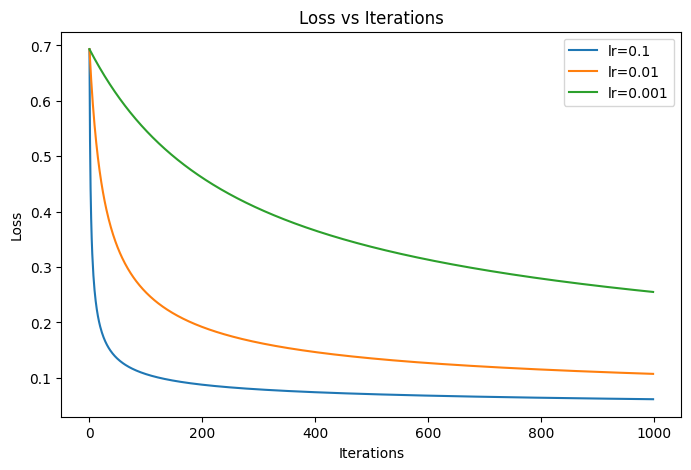

In [5]:
plt.figure(figsize=(8,5))

for lr in learning_rates:
    plt.plot(models[lr].losses, label=f"lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.legend()
plt.show()


Prediction and Evaluation

• Implement prediction function (threshold = 0.5)

• Compute:

o Accuracy

o Confusion Matrix

o Classification Report


In [6]:
# Choose best learning rate (example: 0.01)
best_model = models[0.01]

y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9824561403508771

Confusion Matrix:
 [[70  1]
 [ 1 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [7]:
model_no_scaling = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model_no_scaling.fit(X_train, y_train)

y_pred_no_scaling = model_no_scaling.predict(X_test)

print("Accuracy without scaling:", accuracy_score(y_test, y_pred_no_scaling))

Accuracy without scaling: 0.9473684210526315


/tmp/ipython-input-98600163.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
